# Regresión lineal múltiple
#### Estadística 2
##### Por: Jorge Iván Reyes Hernández

Recordemos que uno de los objetivos del análisis de regresión es __describir y explicar relaciones entre variable__. En la regresión simple buscamos explicar una variable (generalmente denotada por $Y$) a través de una única variable independiente o regresora (generalmente denotada por $X$). En la regresión múltiple buscamos explicar una variable, $Y$ a través de múltiples regresores, $X_1, \ldots, X_k$.

En general, el modelo de regresión es
$$
Y = f(X_1,\ldots,X_k) + \epsilon
$$

## 1. Formulación del modelo

El primer paso en el análisis de regresión es la formulación del modelo. 
Aquí debemos:
1. Seleccionar las variables ($X_1,\ldots,X_k$).

    Debe haber un balance entre la simplicidad del modelo (forma de la $f$) y la complejidad (qué tantas variables usar).
    
2. Especificar la forma funcional del modelo ($f$).
    
    En regresión lineal, $f$ es una función lineal (de los parámetros):
    
    $$
    Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_k X_k + \epsilon
    $$
    
3. Hacer suposiciones acerca del error aleatorio ($\epsilon$).

    $$
        \epsilon \sim \mathcal{N}(0,\sigma^{2})
    $$
    

Para ilustrar lo anterior, considere los siguientes datos.

In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from statsmodels.stats.outliers_influence import GLMInfluence


Documentación útil
- [statsmodels](https://www.statsmodels.org/stable/)
- [statsmodels.regression.linear_model.OLSResults](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html#statsmodels.regression.linear_model.OLSResults)
- [GLS](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.GLS.html#statsmodels.regression.linear_model.GLS)
- [statsmodels.regression.linear_model.RegressionResults](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html)

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv("data_sales.csv")


In [4]:
data


,Periodo (por 3 meses),Ventas (en miles de unidades),Publicidad (en miles de euros),Precio (euros por unidad),Difusión (en miles de euros)
0,1,2596,203,1.42,150
1,2,2709,216,1.41,120
2,3,2552,207,1.95,146
3,4,3004,250,1.99,270
4,5,3076,240,1.63,200
5,6,2513,226,1.82,93
6,7,2626,246,1.69,70
7,8,3120,250,1.65,230
8,9,2751,235,1.99,166
9,10,2965,256,1.53,116


Intuitivamente podemos pensar que mientras más se invierta en publicidad, mayores serán las ventas. Si $Y$ indica las ventas, entonces podríamos interesarnos por explicar cómo varían las ventas esperadas conforme varía el gasto en publicidad.

$$
    \mathbb{E}(Y|X) = f(X_1)
$$

Si asumimos que $f(X_1) = \beta_0 + \beta_1 X_1$, obtenemos el modelo de regresión lineal simple.

In [5]:
Y = data["Ventas (en miles de unidades)"]


In [6]:
X_1 = data["Publicidad (en miles de euros)"]


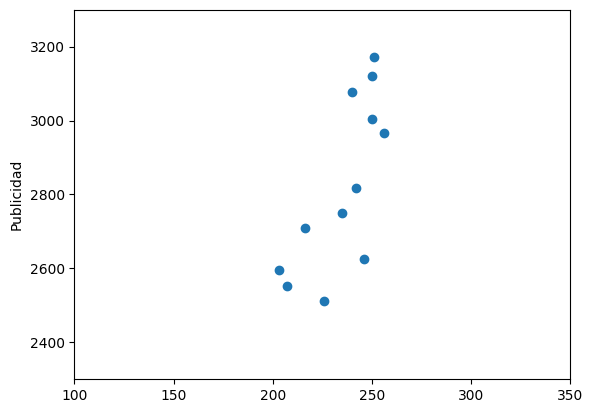

In [7]:
plt.ylabel("Ventas")
plt.ylabel("Publicidad")
plt.xlim([100,350])
plt.ylim([2300,3300])
plt.scatter(X_1, Y);


In [8]:
# Pearson correlation coefficient and p-value for testing non-correlation.

stats.pearsonr(X_1, Y)


PearsonRResult(statistic=0.7424104360176366, pvalue=0.005685256582679205)

El coeficiente de correlación de Pearson confirma que existe asociación lineal entre las ventas ($Y$) y la publicidad ($X_1$).

## 2. Estimación de la función de regresión

Como hay correlación entre las variables, tiene sentido ajustar un modelo de regresión lineal.

In [9]:
results_1 = sm.OLS(Y, sm.add_constant(X_1)).fit()


In [10]:
results_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Ventas (en miles de unidades)   R-squared:                       0.551
Model:                                       OLS   Adj. R-squared:                  0.506
Method:                            Least Squares   F-statistic:                     12.28
Date:                           Wed, 10 May 2023   Prob (F-statistic):            0.00569
Time:                                   14:04:37   Log-Likelihood:                -77.182
No. Observations:                             12   AIC:                             158.4
Df Residuals:                                 10   BIC:                             159.3
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            560.4884    647.974      0.865      0.407    -883.289    2004.265
Publicidad (en miles de euros)     9.6297      2.748      3.504      0.006       3.507      15.753
==============================================================================
Omnibus:                        0.835   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.659   Jarque-Bera (JB):                0.650
Skew:                          -0.489   Prob(JB):                        0.722
Kurtosis:                       2.414   Cond. No.                     3.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Del resumen anterior podemos notar que
$$
    \hat{Y} = 560.49 + 9.63 X_1
$$

La interpretación del coeficiente asociado a $X_1$ (la publicidad) es que si incrementamos en una unidad $X_1$ (i.e, en un euro el gasto en publicidad), entonces se espera que las ventas aumenten en $9.63$ unidades.

---
__Correlación vs regresión__

Una pregunta natural es: si ya vimos que las ventas ($Y$) y la publicidad ($X_1$) están asociados linealmente (pues el coeficiente de correlación de Pearson es aprox. 0.7), ¿por qué hacer una regresión lineal?

- La correlación (de Pearson) y la regresión son usadas para medir qué tanta relación existe entre variables.
- En análisis de regresión mide el efecto que tiene una variable independiente ($X_i$) en la variable dependiente ($Y$), la correlación no.
- Con el análisis de regresión es posible realizar predicciones.
- En el análisis de regresión se distinguen entre variables dependientes e independientes, $Y$ y $X$, el coeficiente de correlación de Pearson no (pues es simétrico, $r_{XY} = r_{YX}$).
- En el análisis de regresión, la relación causal tiene una dirección:
$$
X \to Y\\
\text{Causa} \to \text{Efecto}
$$
- Correlación no implica causalidad (The phrase "correlation does not imply causation" refers to the inability to legitimately deduce a cause-and-effect relationship between two events or variables solely on the basis of an observed association or correlation between them [Correlation does not imply causation](https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation))

---

Una forma de comparar modelos es a través de la suma de los errores al cuadrado 

$$
SSR = \sum_i (y_i - \hat{y}_i)^{2}
$$

Un modelo con menor $SSR$ (comparado con otro) explica mayor variabilidad en $Y$ usando $X_i$.


In [11]:
SSR_1 = sum(results_1.resid ** 2)
SSR_1


271216.5389327144

Para este modelo $SSR = 271,216$.

Podemos considerar otros modelos usando otra variable regresora para explicar la variabilidad en las ventas.

In [12]:
X_2 = data["Precio (euros por unidad)"]
X_3 = data["Difusión (en miles de euros)"]


In [13]:
results_2 = sm.OLS(Y, sm.add_constant(X_2)).fit()
results_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Ventas (en miles de unidades)   R-squared:                       0.002
Model:                                       OLS   Adj. R-squared:                 -0.098
Method:                            Least Squares   F-statistic:                   0.02267
Date:                           Wed, 10 May 2023   Prob (F-statistic):              0.883
Time:                                   14:04:37   Log-Likelihood:                -81.975
No. Observations:                             12   AIC:                             167.9
Df Residuals:                                 10   BIC:                             168.9
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2919.8312    633.314      4.610      0.001    1508.719    4330.943
Precio (euros por unidad)   -55.4892    368.571     -0.151      0.883    -876.717     765.738
==============================================================================
Omnibus:                        3.551   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.169   Jarque-Bera (JB):                1.144
Skew:                           0.146   Prob(JB):                        0.564
Kurtosis:                       1.516   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
results_3 = sm.OLS(Y, sm.add_constant(X_3)).fit()
results_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Ventas (en miles de unidades)   R-squared:                       0.509
Model:                                       OLS   Adj. R-squared:                  0.460
Method:                            Least Squares   F-statistic:                     10.36
Date:                           Wed, 10 May 2023   Prob (F-statistic):            0.00920
Time:                                   14:04:37   Log-Likelihood:                -77.724
No. Observations:                             12   AIC:                             159.4
Df Residuals:                                 10   BIC:                             160.4
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         2400.0668    141.124     17.007      0.000    2085.623    2714.511
Difusión (en miles de euros)     2.7172      0.844      3.218      0.009       0.836       4.599
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                0.891
Skew:                          -0.041   Prob(JB):                        0.641
Kurtosis:                       1.668   Cond. No.                         474.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

De donde

$$
    \hat{Y} = 560 + 9.63 X_1 \\
    \hat{Y} = 2920 - 55.5 X_2 \\
    \hat{Y} = 2400 + 2.72 X_3
$$

con $X_1$: publicidad, $X_2$: precio, $X_3$: difusión.

El problema con hacer esto es que, dados los valores de los regresores, cada ecuación da un valor distinto para las ventas estimadas. ¿A cuál le hacemos caso?

La solución es considerar las variables de manera simultánea dentro del modelo (i.e hacer regresión múltiple), por lo que hay que cambiar la forma de $f$.

Como en el caso simple, el primer paso es calcular la matriz de correlación.

In [15]:
corr_mat = data.drop(columns="Periodo (por 3 meses)").corr()


In [16]:
corr_mat


,Ventas (en miles de unidades),Publicidad (en miles de euros),Precio (euros por unidad),Difusión (en miles de euros)
Ventas (en miles de unidades),1.000000,0.742410,-0.047555,0.713270
Publicidad (en miles de euros),0.742410,1.000000,0.155163,0.289812
Precio (euros por unidad),-0.047555,0.155163,1.000000,0.298821
Difusión (en miles de euros),0.713270,0.289812,0.298821,1.000000


De lo anterior podemos notar que:

1. La correación entre las ventas y la publicidad es (aprox) $0.74$.
2. La correación entre las ventas y el precio es (aprox) $-0.048$.
2. La correación entre las ventas y la difusión es (aprox) $0.713$.


Con la información anterior podríamos, por ejemplo, ajustar un modelo considerando las ventas $Y$, la publicidad $X_1$ y el precio $X_2$, o cualquier conbinación de las 3 co-variables.

In [17]:
X_1


0     203
1     216
2     207
3     250
4     240
5     226
6     246
7     250
8     235
9     256
10    242
11    251
Name: Publicidad (en miles de euros), dtype: int64

In [18]:
X_2


0     1.42
1     1.41
2     1.95
3     1.99
4     1.63
5     1.82
6     1.69
7     1.65
8     1.99
9     1.53
10    1.69
11    1.72
Name: Precio (euros por unidad), dtype: float64

In [19]:
X_12 = np.asmatrix([X_1, X_2]).T
X_12.shape


(12, 2)

In [20]:
results_4 = sm.GLS(Y, sm.add_constant(X_12)).fit()
results_4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  GLS Regression Results                                 
=========================================================================================
Dep. Variable:     Ventas (en miles de unidades)   R-squared:                       0.578
Model:                                       GLS   Adj. R-squared:                  0.485
Method:                            Least Squares   F-statistic:                     6.171
Date:                           Wed, 10 May 2023   Prob (F-statistic):             0.0205
Time:                                   14:04:37   Log-Likelihood:                -76.808
No. Observations:                             12   AIC:                             159.6
Df Residuals:                                  9   BIC:                             161.1
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        813.8182    741.014      1.098      0.301    -862.471    2490.108
x1             9.9654      2.842      3.506      0.007       3.536      16.395
x2          -194.5880    255.669     -0.761      0.466    -772.951     383.775
==============================================================================
Omnibus:                        1.331   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.514   Jarque-Bera (JB):                0.819
Skew:                          -0.605   Prob(JB):                        0.664
Kurtosis:                       2.581   Cond. No.                     3.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

De donde obtenemos que

$$
\hat{Y} = 814 + 9.97 X_1 - 194.6 X_2
$$

1. El modelo ya no es una recta, es un plano.
2. Que el coeficiente de $X_2$ (el precio) sea negativo refleja el hecho de que si el precio aumenta, las ventas (pueden) disminuyen.
3. La magnitud de los coeficientes no está relacionada con la importancia de esa variable al explicar $Y$.

Para poder comparar los coeficientes primero hay que estandarizarlos [Standardized coefficient](https://en.wikipedia.org/wiki/Standardized_coefficient).

$$\beta^{st}_j = \beta_j \frac{s_{x_j}}{s_y}$$

donde $s$ indica desviación estándar.

In [21]:
s_x1 = X_1.std()
s_x1


18.069730255738506

In [22]:
s_x2 = X_2.std()
s_x2


0.20086743706416746

In [23]:
s_y = Y.std()
s_y


234.3809867922246

Los coeficientes estandarizados son

$$
\beta_1^{st} = (9.97) \frac{18.07}{234.38} = 0.768 \\
\beta_2^{st} = (-194.6) \frac{0.201}{234.38} = -0.167 \\
$$

- Los beta's estandarizados son usados como una medida de la importancia de la variables.
- Los beta's estandarizados son los coeficientes de la regresión al ajustar el modelo con las variables estandarizadas.

Podemos observar que la publicidad es más importante, i.e, tiene mayor influencia (al explicar la variabilidad en las ventas) que el precio del producto.

In [24]:
# SSR con publicidad y precio.
SSR_4 = sum(results_4.resid ** 2)
SSR_4


254815.93272616263

Ahora vamos a ajustar el modelo usando las 3 variables explicativas que tenemos.

In [25]:
X_123 = np.asmatrix([X_1, X_2, X_3]).T
X_123.shape


(12, 3)

In [26]:
results_5 = sm.GLS(Y, sm.add_constant(X_123)).fit()
results_5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  GLS Regression Results                                 
=========================================================================================
Dep. Variable:     Ventas (en miles de unidades)   R-squared:                       0.922
Model:                                       GLS   Adj. R-squared:                  0.893
Method:                            Least Squares   F-statistic:                     31.50
Date:                           Wed, 10 May 2023   Prob (F-statistic):           8.84e-05
Time:                                   14:04:37   Log-Likelihood:                -66.686
No. Observations:                             12   AIC:                             141.4
Df Residuals:                                  8   BIC:                             143.3
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1248.2760    345.981      3.608      0.007     450.443    2046.109
x1             7.9081      1.342      5.891      0.000       4.812      11.004
x2          -387.5722    121.116     -3.200      0.013    -666.867    -108.277
x3             2.4222      0.408      5.935      0.000       1.481       3.363
==============================================================================
Omnibus:                        1.924   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                0.898
Skew:                          -0.160   Prob(JB):                        0.638
Kurtosis:                       1.698   Cond. No.                     4.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Podemos ver que

$$
\hat{Y} = 1248 + 7.91 X_1 + -387-6 X_2 + 2.42 X_3
$$

Para medir la importancia de las variables sobre $Y$ hay que calcular las beta's estandarizadas.

$$
\beta_1^{st} = 0.610\\
\beta_2^{st} = -0.332\\
\beta_3^{st} = 0.636
$$

In [27]:
# SSR con todas las variables
SSR_5 = sum(results_5.resid ** 2)
SSR_5


47166.36496770067

Podemos observar que al incluir más variables $SSR$ disminuye:

1. Usando publicidad: $SSR=271,216.53$ 
2. Usando publicidad y precio: $SSR = 254,815.93$
3. Usando publicidad, precio y difusión: $SSR = 47,166.36$.

Como el $SSR$ nos ayuda a comparar modelos, podemos concluir que el tercer modelo explica mejor la variabilidad de las ventas.

## 3. Verificación de la regresión

Una vez ajustado el modelo (i.e, estimados los parámetros), hay que verificar la bondad o calidad del modelo.

Como ya se dijo, para comparar distintos modelos (y determinar cuál es mejor) podemos usar $SSR$. Sin embargo, esta medida no nos ayuda a decidir si un único modelo es bueno o malo, o qué tan bueno o qué tan malo.

Para medir la bondad del ajuste de un modelo podemos usar:

1. Error estándar de la regresión.
2. Coeficiente de determinación.
3. Estadística $F$ y su $p_{\text{val}}$.
4. Coeficiente de determinación ajustado.
---

1. __Error estándar__.

El error estándar mide qué tan cercanas son las observaciones observadas de las esperadas. Se calcula como la desviación estándar de los residuales:

$$
SE = \sqrt{\frac{SSR}{n-k-1}}
$$

$n-k-1$ son los grados de libertad del modelo (i.e número de observaciones menos número de parámetros estimados).

Para nuestros modelos:

In [28]:
# Usando únicamente publicidad
SE_1 = np.sqrt(SSR_1 / (data.shape[0] - 1 - 1 ))
SE_1


164.68653221581732

In [29]:
# Usando publicidad y precio
SE_4 = np.sqrt(SSR_4 / (data.shape[0] - X_12.shape[1] - 1 ))
SE_4


168.2643200860422

In [30]:
# Usando publicidad, precio y difusión
SE_5 = np.sqrt(SSR_5 / (data.shape[0] - X_123.shape[1] - 1 ))
SE_5


76.78408442485059

Lo usual es obtener estos valores normalizados (divididos por $\bar{y}$) y en porcentaje.

In [31]:
(SE_1 / Y.mean()) * 100


5.829439799975835

In [32]:
(SE_4 / Y.mean()) * 100


5.956083422413812

In [33]:
(SE_5 / Y.mean()) * 100


2.7179405123689775

Podemos notar que el modelo 1 (usando publicidad) presenta menor error estándar que el modelo 4 (usando publicidad y precio), por lo que el modelo 1 es mejor, en términos de precisión. El modelo 4 es mejor en términos de que explica más variabilidad total en $Y$ (menor $SST$) que el modelo 1, pero tiene menor precisión (mayor $SE$).

2. __Coeficiente de determinación__

Otra medida de la bondad del ajuste es el _coeficiente de determinación_, $R^2$, definido por

$$
R^{2}(\underline{X},\underline{Y}) = \frac{SSE}{SST} = 1 - \frac{SSR}{SST}, \hspace{0.8cm} 0\leq R^2 \leq 1
$$

con 

$SST = \sum (y_i - \bar{y})^{2}$: Variación total

$SSE = \sum (\hat{y}_i - \bar{y})^{2}$: Variación explicada por el modelo

$SSR = \sum (y_i - \hat{y}_i)^{2}$: Variación que no es explicada por el modelo

Para el modelo de regresión lineal simple, también se puede calcular como la correlación entre $Y$ y $X$ al cuadrado,

$$
R^{2} = r_{YX}^{2}
$$

Para el modelo de regresión múltiple, también se puede calcular como la correlación entre $Y$ e $\hat{Y}$ al cuadrado,

$$
R^{2} = r_{Y\hat{Y}}^{2}
$$

En este caso, $r_{Y\hat{Y}}$ es llamada _correlación múltiple_.

##### Interpretación

El coeficiente de determinación puede ser interpretado como _la proporción de variabilidad total en $Y$ que es explicada por los regresores_.

---

Para nuestros modelos:

In [34]:
# Usando únicamente publicidad
results_1.rsquared


0.5511732555078976

In [35]:
# Usando publicidad y precio
results_4.rsquared


0.578314043899161

In [36]:
# Usando publicidad, precio y difusión
results_5.rsquared


0.9219460357348217

Podemos notar que __el coeficiente de determinación aumenta conforme usamos más regresores__.
Esto no es necesariamente bueno, pues podríamos agregar más variables (e.g no significativas) e incrementar artificialmente $R^{2}$.
Para arreglar esto y evitar el __sobreajuste__, más adelante modificaremos (o ajustaremos) el coeficiente de determinación para que _penalice_ usar demasiadas variables.

3. __Prueba $F$.__

Recordemos que el modelo, considerando la componente estocástica ($\epsilon$), es

$$
Y = \beta_0 + \beta_1 X_1 + \ldots \beta_k X_k + \epsilon
$$

Aunque el modelo incluya $k$ regresores, puede que no todos (o ninguno) contribuya a explicar la variabilidad de $Y$. La pregunta natural es, dado el modelo, ¿este puede contribuir a explicar la variabilidad de la variable respuesta?

Note que si algún coeficiente, $\beta_i = 0$, eso indica que el regresor correspondiente, $X_i$, no es significativo, i.e, $X_i$ no contribuye a explicar la variabilidad de $Y$.

Para comprobar la significancia de la regresión queremos contrastar las siguientes hipótesis:

$$
H_0 : \beta_i = 0, \hspace{0.2cm} \forall i\in\{1,\ldots,k\}
$$
$$
H_a : \exists j\in \{1,\ldots,k\}, \hspace{0.2cm} \beta_j \neq 0
$$

Lo que queremos es rechazar la hipótesis nula, porque queremos que al menos un regresor sea significativo.

La estadística de prueba es una estadística $F$ que puede calcularse como el cociente de las varianzas muestrales o en términos del coeficiente de determinación,

$$
F_{\text{obs}} = \frac{MS_E}{MS_R} = \frac{R^2 / k}{(1-R^2)/(n-k-1)}
$$

con $MS_E = \frac{SSE}{k}$, $MS_R = \frac{SSR}{n-k-1}$ y $MS_T = \frac{SST}{n-1}$.

Para nuestros modelos:

In [37]:
# Usando únicamente publicidad
results_1.fvalue


12.280312220066383

In [38]:
# Usando publicidad y precio
results_4.fvalue


6.171448586075039

In [39]:
# Usando publicidad, precio y difusión
results_5.fvalue


31.49773089816437

Para tomar una decisión nos fijamos en los $p_{\text{val}}$ para cada modelo.

In [40]:
# Usando únicamente publicidad
results_1.f_pvalue


0.005685256582679184

In [41]:
results_2.f_pvalue

0.8833224032795347

In [42]:
# Usando publicidad y precio
results_4.f_pvalue


0.020532939072995863

In [43]:
# Usando publicidad, precio y difusión
results_5.f_pvalue


8.844418443001937e-05

Si tomamos el nivel de significancia, $\alpha=0.05$, conclumos que los 3 modelos son significativos (i.e incluyen al menos una variable significativa).

4. __$R^2$ ajustada.__

Aunque la prueba $F$ nos ayuda a determinar si un conjunto de variables (regresoras) son significativas, no nos ayuda a _selecionar_ las mejores variables. Un criterio para elegir el modelo con las mejores variables es usar la $R^{2}_{\text{adj}}$.

El coeficiente de determinación ajustado se define como:

$$
R^{2}_{\text{adj}}= 1 - \frac{SSR/(n-k-1)}{SST/(n-1)} = 1 - \frac{MS_R}{MS_T}
$$

El coeficiente de determinación ajustado corrige varios problemas que puede tener $R^2$:

- $R^2$ no toma en cuenta el número de observaciones, $n$, con las cuales se realiza el análisis de regresión.
- $R^2$ no considera el número de variables independientes (regresores) que con usadas en el modelo (no penaliza la complejidad del modelo).

Incrementar el número de variables aumenta la complejidad del modelo y el valor de $R^2$, pero no necesariamente qué tan bueno es el ajuste. Un modelo demasiado complejo puede cometer _overfitting_, es decir, el modelo puede estar demasiado ajustado a los datos y no generalizar bien.

Para nuestro modelo:

In [44]:
# Usando únicamente publicidad
results_1.rsquared_adj


0.5062905810586873

In [45]:
# Usando publicidad y precio
results_4.rsquared_adj


0.48460605365453

In [46]:
# Usando publicidad, precio y difusión
results_5.rsquared_adj


0.8926757991353799

Podemos notar que al considerar la variable precio, el coeficiente de determinación ajustado disminuye: el precio contribuye muy poco para explicar la variabilidad de las ventas, y su baja contribución no compensa la penalización que agrega $R^{2}_{\text{adj}}$ por aumentar la complejidad del modelo.

## 4. Verificación de los coeficientes de la regresión

1. Precisión de los coeficientes.
2. Prueba $T$.
3. Selección de variables
4. Intervalos de confianza para los coeficientes.

1. __Precisión de los coeficientes__.

La precisión de los estimadores de los parámetros ($\beta_0,\beta_1,\ldots,\beta_k$) se define como el inverso de su desviación estándar (a.k.a. error estándar).

Para el modelo de regresión lineal simple, el error estándar de $\hat{\beta}_1$ está dado por:

$$
se(\hat{\beta}_1) = \frac{SE}{\sigma_x \sqrt{n-1}}
$$

con $SE$ el error estándar de la regresión y $\sigma_x$ la desviación estándar del único regresor.

Para el modelo de regresión lineal múltiple, el error estándar de $\hat{\beta}_j$ está dado por:

$$
se(\hat{\beta}_j) = \frac{SE}{\sigma_{x_j} \sqrt{n-1} \sqrt{1- R_j ^2}}
$$

con $SE$ el error estándar de la regresión, $\sigma_{x_j}$ la desviación estándar del $j$-ésimo regresor, y $R_j^{2}$ el coeficiente de determinación de un modelo ajustado considerando a $X_j$ como variable respuesta y a las demás variables independientes como regresores.

Para nuestros modelos:

In [47]:
results_1.bse

const                             647.974452
Publicidad (en miles de euros)      2.747958
dtype: float64

In [48]:
results_2.bse

const                        633.314205
Precio (euros por unidad)    368.571043
dtype: float64

In [49]:
results_3.bse

const                           141.124165
Difusión (en miles de euros)      0.844342
dtype: float64

In [50]:
results_4.bse

const    741.013753
x1         2.842077
x2       255.668979
dtype: float64

In [51]:
results_5.bse

const    345.980671
x1         1.342457
x2       121.116483
x3         0.408148
dtype: float64

Note que valores pequeños del error estándar indican mayor precisión.

Además de ser una medida de presición, los errores estándar nos sirven para construir intervalos de confianza para los parámetros.

2. __Prueba $T$__.

Ya habíamos visto que la prueba $F$ nos ayuda a determinar si la regresión es significativa, es decir, si de los regresores considerados, al menos uno contribuye a explicar la variabilidad en $Y$. Para verificar si una única variable es significativa, es decir, si influye en $Y$ (o en otras palabras, si su coeficiente asociado no es cero) tenemos que realizar una prueba $T$.

_Obs_: La prueba $F$ es para grupos de variables, mientras que la prueba $T$ solo es adecuada para una única variable. Para el modelo de regresión lineal simple, $F=T^{2}$, por lo que ambas pruebas son equivalentes.


Queremos determinar si el regresor $X_j$ es significativo, es decir si influye en $Y$. Debemos contrastar las hipótesis:

$$
H_0 = \beta_j = 0 \hspace{0.2cm} \text{ v.s } \hspace{0.2cm} H_a: \beta_j \neq 0
$$

Para ver que $X_j$ es significativa, tenemos que rechazar $H_0$.

La estadística de prueba, bajo $H_0$, se distribuye $T$ de Student con $n-k-1$ grados de libertad y está dada por

$$
t_{\text{obs}} = \frac{\hat{\beta}_j}{se(\hat{\beta}_j)}
$$

Para nuestros modelos:

In [52]:
results_1.pvalues

const                             0.407318
Publicidad (en miles de euros)    0.005685
dtype: float64

In [53]:
results_2.pvalues

const                        0.000965
Precio (euros por unidad)    0.883322
dtype: float64

In [54]:
results_3.pvalues

const                           1.040421e-08
Difusión (en miles de euros)    9.204207e-03
dtype: float64

In [55]:
results_4.pvalues

const    0.300606
x1       0.006656
x2       0.466074
dtype: float64

In [56]:
results_5.pvalues

const    0.006902
x1       0.000366
x2       0.012612
x3       0.000348
dtype: float64

Si fijamos $\alpha = 0.05$, podemos notar que la publicidad y la difusión son significaticas (en el modelo lineal simple), pero el precio no lo es. El el modelo de regresión múltiple, el precio no es significativo (modelo 4) o es la menos significativa (modelo 5).

3. __Selección de variables__

Otras técnicas de seleccionar variables significativas es usando __backward selection__ y __forward selection__.

La idea de forward selection es comenzar con el modelo nulo (el modelo sin variables regresoras, únicamente el intercepto) y luego ajustar tantos modelos como variables regresoras se tengan: cada modelo con un único regresor. Luego, agregar el modelo aquella variable cuyo ajuste individual tenga menor $SSR$. Este proceso se repite.

La idea de backward selection es comenzar con un modelo que contenga todos los regresores y remover aquella variable cuyo $p_{\text{val}}$ (asociado a la prueba $T$) sea mayor (es decir, la variable menos significativa). Luego se vuelve a ajustar el modelo usando las variables restantes y se repite el procedimiento.

- Forward selection:

In [57]:
results_1.ssr


271216.5389327144

In [58]:
results_2.ssr


602912.3560712741

In [59]:
results_3.ssr


296849.73973466316

Usando forward selection la primera variable que incluimos es $X_1$: publicidad y luego $X_3$: difusión. Podríamos no incluir $X_2$: precio debido a su alto valor de $SSR$.

- Backward selection

In [60]:
results_5.pvalues


const    0.006902
x1       0.000366
x2       0.012612
x3       0.000348
dtype: float64

Usando backward selection la primera variable a eliminar es $X_2$: precio.

Para más detalles véase [An Introduction to Statistical Learning](https://link.springer.com/book/10.1007/978-1-0716-1418-1)

4. __Intervalos de confianza para los coeficientes__.

Además de dar estimaciones puntuales para los parámetros podemos preguntarnos por intervalos de confianza para los mismos.

Los intervalos de confianza para los parámetros $\beta_j$ están dados por

$$
\hat{\beta}_j - q_{\alpha /2}(t_{n-k-1})se(\hat{\beta}_j) \leq \beta _j \leq \hat{\beta}_j + q_{\alpha /2}(t_{n-k-1})se(\hat{\beta}_j) 
$$

La interpretación de estos intervalos de confianza es la usual: si el nivel de confianza es $1-\alpha$, entonces la probabilidad (frecuentista) de que el valor verdadero del parámetro, $\beta_j$, esté en el intervalo es $1-\alpha$.

El error de la estimación por intervalo (i.e la probabilidad de que el parámetro verdadero no caiga en el intervalo) es $\alpha$. Este valor está relacionado inversamente a la longitud del intervalo: a menor error $\alpha$, mayor longitud del intervalo.

Para nuestros modelos:

In [61]:
# Por defecto alpha=0.05, por lo que se obtienen
# intervalos al 95% de confianza
results_1.conf_int()


,0,1
const,-883.288699,2004.265404
Publicidad (en miles de euros),3.506913,15.752577


In [62]:
results_2.conf_int()

,0,1
const,1508.719180,4330.943149
Precio (euros por unidad),-876.716673,765.738247


In [63]:
results_3.conf_int()

,0,1
const,2085.622534,2714.511003
Difusión (en miles de euros),0.835895,4.598520


In [64]:
results_4.conf_int()

,0,1
const,-862.471358,2490.107782
x1,3.536149,16.394601
x2,-772.951368,383.775458


In [65]:
results_5.conf_int()

,0,1
const,450.443139,2046.108856
x1,4.812351,11.003773
x2,-666.867267,-108.277046
x3,1.481020,3.363402


## 5. Verificación de los supuestos

1. Linealidad en los parámetros.
2. Todas las variables relevantes están incluídas.
3. Homocedasticidad ($\mathbb{V}ar(\epsilon_i) = \sigma^{2}$).
4. No autocorrelación ($\mathbb{C}ov(\epsilon _i, \epsilon_j) = 0$).
5. Errores normalmente distribuidos ($\epsilon_i \sim \mathcal{N}(0, \sigma^{2})$).
6. No hay multicolinealidad perfecta.
7. Valores atípicos

__Obs__: Que se cumplan los supuestos del modelo de regresión es _necesario pero no suficiente_ para obtener buenas estimaciones. Para aumentar la precisión del modelo es requerido que haya suficiente variación o dispersión en las variables independientes, tamaños de muestra suficientemente grandes y baja multicolinealidad.


1. __Linealidad en los parámetros__

Uno de los supuestos iniciales fue la elección de $f$ de tal manera que

$$
    Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_k X_k + \epsilon
$$

La ecuación anterior es _lineal en los parámetros_, por lo que reemplazar cualquier variable, $X_i$, por una función de ella, $f_i(X_i)$, con $f_i$ una función que no depende de los parámetros, no rompe el supuesto inicial de linealidad. Entonces, el modelo de regresión lineal se puede plantaear como

$$
    f_0(Y) = \beta_0 + \beta_1 f_1 (X_1) + \ldots + \beta_k f_k (X_k) + \epsilon
$$

donde las funciones $f_i$ nos pueden ayudar a _corregir_ alguna depencia no lineal en los regresores.

Por ejemplo, el siguiente gráfico de dispersión muestra una posible relación no-lineal entre dos variables.

In [66]:
n = 10
np.random.seed(10)
x = np.linspace(0, 1000, n) 
y = np.sqrt(x) + np.random.normal(loc=0, scale=2, size=n)

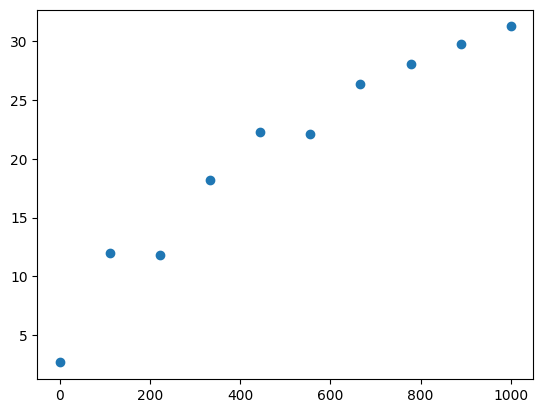

In [67]:
plt.scatter(x, y);

Si ajustamos un modelo lineal.

In [68]:
results_nl = sm.OLS(y, sm.add_constant(x)).fit()


In [69]:
results_nl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     113.9
Date:                Wed, 10 May 2023   Prob (F-statistic):           5.21e-06
Time:                        14:04:38   Log-Likelihood:                -22.305
No. Observations:                  10   AIC:                             48.61
Df Residuals:                       8   BIC:                             49.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1598      1.479      4.840      0.001       3.748      10.571
x1             0.0266      0.002     10.673      0.000       0.021       0.032
==============================================================================
Omnibus:                        0.679   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.712   Jarque-Bera (JB):                0.505
Skew:                          -0.460   Prob(JB):                        0.777
Kurtosis:                       2.395   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Si aplicamos la transformación $x \to \sqrt{x}$, corregimos la no linealidad.

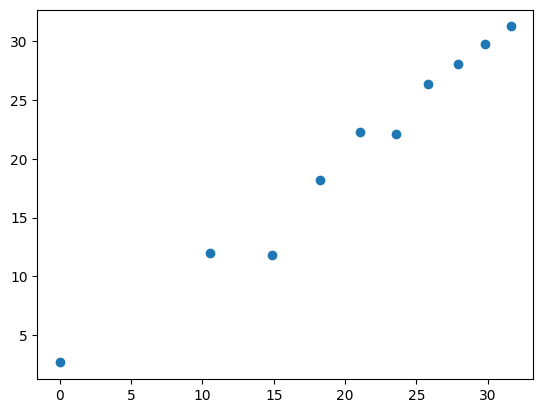

In [70]:
plt.scatter(np.sqrt(x), y);

In [71]:
results_nl_tra = sm.OLS(y, sm.add_constant(np.sqrt(x))).fit()
results_nl_tra.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     314.3
Date:                Wed, 10 May 2023   Prob (F-statistic):           1.05e-07
Time:                        14:04:38   Log-Likelihood:                -17.443
No. Observations:                  10   AIC:                             38.89
Df Residuals:                       8   BIC:                             39.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4092      1.181      1.193      0.267      -1.315       4.133
x1             0.9366      0.053     17.730      0.000       0.815       1.058
==============================================================================
Omnibus:                       11.599   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                5.370
Skew:                          -1.612   Prob(JB):                       0.0682
Kurtosis:                       4.578   Cond. No.                         54.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

También es posible agregar los efectos de la interacción entre variables. 

Por ejemplo, el precio ($X_2$) y la difusión ($X_3$) tienen un efecto conjunto: una reducción del precio podría no ser notada por los consumidores si no hay suficiente difusión. También podría ocurrir que el efecto (en la ventas) de la difusión se vea incrementado si también hay una reducción del precio.

Estas interacciones se agregan como el producto de las variables. En el ejemplo concreto,

$$
    Y = \beta_0 + \beta_1 X_1 + \beta_3 X_3 + \beta_{2,3} X_2 X_3 + \epsilon
$$

es el modelo que considera la publicidad ($X_1$), la difusión ($X_3$) y el efecto conjunto del precio y la difusión  ($X_2 X_3$).

In [72]:
X_1323 = np.asmatrix([X_1, X_3, X_2*X_3]).T


In [73]:
results_6 = sm.GLS(Y, sm.add_constant(X_1323)).fit()
results_6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  GLS Regression Results                                 
=========================================================================================
Dep. Variable:     Ventas (en miles de unidades)   R-squared:                       0.940
Model:                                       GLS   Adj. R-squared:                  0.917
Method:                            Least Squares   F-statistic:                     41.57
Date:                           Wed, 10 May 2023   Prob (F-statistic):           3.17e-05
Time:                                   14:04:38   Log-Likelihood:                -65.137
No. Observations:                             12   AIC:                             138.3
Df Residuals:                                  8   BIC:                             140.2
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        529.4479    270.989      1.954      0.086     -95.454    1154.349
x1             8.0754      1.183      6.826      0.000       5.347      10.803
x2             6.9181      1.274      5.429      0.001       3.980       9.856
x3            -2.5346      0.641     -3.952      0.004      -4.014      -1.056
==============================================================================
Omnibus:                        6.455   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                1.438
Skew:                          -0.119   Prob(JB):                        0.487
Kurtosis:                       1.321   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

2. __Todas las variables relevantes están incluidas__.

Si no se incluyen todas las variables importantes ocurre underfitting.

In [74]:
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Ventas (en miles de unidades)   R-squared:                       0.551
Model:                                       OLS   Adj. R-squared:                  0.506
Method:                            Least Squares   F-statistic:                     12.28
Date:                           Wed, 10 May 2023   Prob (F-statistic):            0.00569
Time:                                   14:04:38   Log-Likelihood:                -77.182
No. Observations:                             12   AIC:                             158.4
Df Residuals:                                 10   BIC:                             159.3
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            560.4884    647.974      0.865      0.407    -883.289    2004.265
Publicidad (en miles de euros)     9.6297      2.748      3.504      0.006       3.507      15.753
==============================================================================
Omnibus:                        0.835   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.659   Jarque-Bera (JB):                0.650
Skew:                          -0.489   Prob(JB):                        0.722
Kurtosis:                       2.414   Cond. No.                     3.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Ventas (en miles de unidades)   R-squared:                       0.002
Model:                                       OLS   Adj. R-squared:                 -0.098
Method:                            Least Squares   F-statistic:                   0.02267
Date:                           Wed, 10 May 2023   Prob (F-statistic):              0.883
Time:                                   14:04:38   Log-Likelihood:                -81.975
No. Observations:                             12   AIC:                             167.9
Df Residuals:                                 10   BIC:                             168.9
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2919.8312    633.314      4.610      0.001    1508.719    4330.943
Precio (euros por unidad)   -55.4892    368.571     -0.151      0.883    -876.717     765.738
==============================================================================
Omnibus:                        3.551   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.169   Jarque-Bera (JB):                1.144
Skew:                           0.146   Prob(JB):                        0.564
Kurtosis:                       1.516   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Ventas (en miles de unidades)   R-squared:                       0.509
Model:                                       OLS   Adj. R-squared:                  0.460
Method:                            Least Squares   F-statistic:                     10.36
Date:                           Wed, 10 May 2023   Prob (F-statistic):            0.00920
Time:                                   14:04:38   Log-Likelihood:                -77.724
No. Observations:                             12   AIC:                             159.4
Df Residuals:                                 10   BIC:                             160.4
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         2400.0668    141.124     17.007      0.000    2085.623    2714.511
Difusión (en miles de euros)     2.7172      0.844      3.218      0.009       0.836       4.599
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                0.891
Skew:                          -0.041   Prob(JB):                        0.641
Kurtosis:                       1.668   Cond. No.                         474.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Pero si se incluyen demasidas variables ocurre un sobreajuste (overfitting).

In [77]:
X_666 = np.asmatrix([X_1, X_2, X_3, X_1*X_2, X_1*X_2*X_3, X_2*X_3,X_1**2, X_2**2, np.sqrt(X_1), np.power(X_2,3)]).T


In [78]:
results_666 = sm.GLS(Y, sm.add_constant(X_666)).fit()
results_666.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  GLS Regression Results                                 
=========================================================================================
Dep. Variable:     Ventas (en miles de unidades)   R-squared:                       0.981
Model:                                       GLS   Adj. R-squared:                  0.792
Method:                            Least Squares   F-statistic:                     5.195
Date:                           Wed, 10 May 2023   Prob (F-statistic):              0.330
Time:                                   14:04:38   Log-Likelihood:                -58.172
No. Observations:                             12   AIC:                             138.3
Df Residuals:                                  1   BIC:                             143.7
Df Model:                                     10                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.188e+05   4.04e+06      0.178      0.888   -5.06e+07     5.2e+07
x1          5363.8316   3.45e+04      0.156      0.902   -4.33e+05    4.43e+05
x2         -2.519e+05   3.43e+05     -0.735      0.597   -4.61e+06     4.1e+06
x3            -1.0872     12.757     -0.085      0.946    -163.182     161.007
x4           -14.7525     73.337     -0.201      0.874    -946.582     917.077
x5            -0.0897      0.153     -0.586      0.662      -2.032       1.853
x6            24.6649     41.029      0.601      0.655    -496.660     545.990
x7            -3.9893     25.024     -0.159      0.899    -321.947     313.969
x8          1.492e+05   2.03e+05      0.734      0.597   -2.43e+06    2.73e+06
x9         -1.051e+05   6.92e+05     -0.152      0.904    -8.9e+06    8.69e+06
x10          -2.9e+04   3.88e+04     -0.746      0.592   -5.23e+05    4.65e+05
==============================================================================
Omnibus:                        3.794   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                1.037
Skew:                           0.021   Prob(JB):                        0.596
Kurtosis:                       4.439   Cond. No.                     1.18e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

¿Cómo detectar variables importantes omitidas?

Si hay variables imporantes omitidas, $\mathbb{E}(\epsilon_i) \neq 0$. Pero eso no nos sirve porque por construcción de los estimadores esto se cumple. Entonces habría que analizarlo gráficamente con un gráfico de Tukey-Anscombe (residuales contra valores ajustados) y comprobar que los puntos son _aleatorios_.

In [79]:
def predictor(X, beta):
    return np.matmul(X, beta)


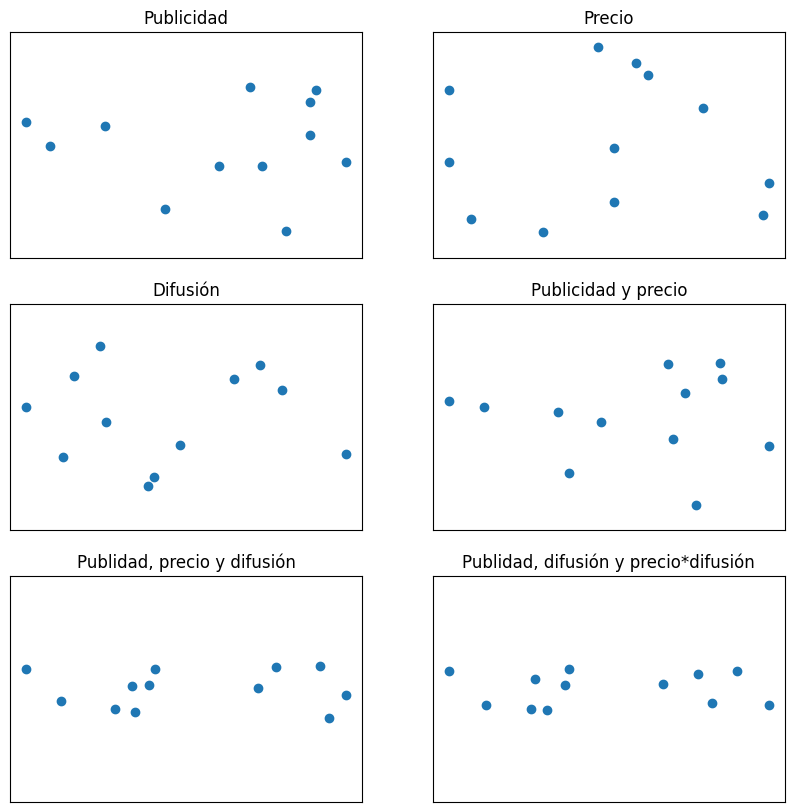

In [80]:
fig, ax = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(10, 10)

models = np.array([[results_1, results_2], 
          [results_3, results_4], 
          [results_5, results_6]])

labels = [["Publicidad", "Precio"], 
          ["Difusión", "Publicidad y precio"], 
          ["Publidad, precio y difusión", "Publidad, difusión y precio*difusión"]]

for i in range(0,3):
    for j in range(0,2):
        ax[i,j].set_xticks([], [])
        ax[i,j].set_yticks([], [])
        ax[i,j].set_title(labels[i][j])
        ax[i,j].grid()
        ax[i,j].set_ylim([-400,400])
        ax[i,j].scatter(predictor(models[i][j].model.exog, models[i][j].params), models[i][j].resid);


3. __Homocedasticidad ($\mathbb{V}ar(\epsilon_i) = \sigma^{2}$)__.

Una de las hipótesis del modelo fue que $\forall i \in \{1,\ldots,n\}, \mathbb{V}ar(\epsilon_i) = \sigma^{2}$. Si esta condición no se cumple, se dice que hay _heterocedasticidad_.

La heterocedasticidad puede provocar que los errores estándar de los coeficientes de la regresión, su estimación y sus intervalos de confianza sean inexactos (y por lo tanto el modelo sea menos preciso).

Podemos detectar heterocedasticidad de manera gráfica o usando pruebas estadísticas.

- Gráficamente

Hay que inspeccionar un gráfico de Tukey-Anscombe (residuales contra valores estimador de $y$).
_Véase gráfica de arriba_

- Numéricamente

También podemos realizar pruebas de Breusch-Pagan o [Goldfeld-Quandt](https://www.statology.org/goldfeld-quandt-test-python/).

__Goldfeld-Quandt__

$$
H_0 : \text{Hay homocedasticidad (la varianza es constante)} \hspace{0.5cm} \text{v.s }\hspace{0.5cm}H_a : \text{Hay heterocedasticidad}
$$

Para nuestros modelos

In [81]:
i = 1
alpha = 0.05

for model in models.flatten():
    print("*** Modelo", i, "***")
    i += 1
    results = sm.stats.diagnostic.het_goldfeldquandt(model.model.endog, model.model.exog, alternative="two-sided")
    p_val = results[1]
    print(f"p_val = {p_val:.3f}")
    if p_val <= alpha:
        print("Rechazamos H_0: la varianza no es constante\n")
    else:
        print("No rechazamos H_0: la varianza es constante\n")
    

*** Modelo 1 ***
p_val = 0.715
No rechazamos H_0: la varianza es constante

*** Modelo 2 ***
p_val = 0.736
No rechazamos H_0: la varianza es constante

*** Modelo 3 ***
p_val = 0.847
No rechazamos H_0: la varianza es constante

*** Modelo 4 ***
p_val = 0.747
No rechazamos H_0: la varianza es constante

*** Modelo 5 ***
p_val = 0.753
No rechazamos H_0: la varianza es constante

*** Modelo 6 ***
p_val = 0.982
No rechazamos H_0: la varianza es constante



__Prueba de Breusch-Pagan__

[Breusch-Pagan test for heteroscedasticity](https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.het_breuschpagan.html)

In [82]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
alpha = 0.05
i = 1

for model in models.flatten():
    print("*** Modelo", i, "***")
    i += 1
    test_result = sms.diagnostic.het_breuschpagan(model.resid, model.model.exog)
    p_val = lzip(names, test_result)[3][1]
    print(f"p_val = {p_val:.3f}")
    if p_val <= alpha:
        print("Rechazamos H_0: la varianza no es constante\n")
    else:
        print("No rechazamos H_0: la varianza es constante\n")


*** Modelo 1 ***
p_val = 0.396
No rechazamos H_0: la varianza es constante

*** Modelo 2 ***
p_val = 0.875
No rechazamos H_0: la varianza es constante

*** Modelo 3 ***
p_val = 0.906
No rechazamos H_0: la varianza es constante

*** Modelo 4 ***
p_val = 0.546
No rechazamos H_0: la varianza es constante

*** Modelo 5 ***
p_val = 0.625
No rechazamos H_0: la varianza es constante

*** Modelo 6 ***
p_val = 0.930
No rechazamos H_0: la varianza es constante



4. __Autocorrelación__

Una de las hipótesis del modelo fue que $\forall i,j\in \{1, \ldots, n\}, i\neq j,  \mathbb{C}ov(\epsilon _i, \epsilon_j) = 0$.

Esta condición implica que las desviaciones de $y_i$ a $\mathbb{E}(y_i|x_i)$ (es decir, del punto observado a la recta) son aleatorias. En particular, las desviaciones no se incrementan o decrementan con $i$.

Para detectar autocorrelación podemos hacerlo  gráficamente o numéricamente.

- Gráficamente

__Autocorrelograma__

Hay que verificar que todas las líneas verticales, a partir de la segunda, no se salgan del intervalo de confianza. Si alguna de las líneas verticales se sale, es posible que haya autocorrelación.

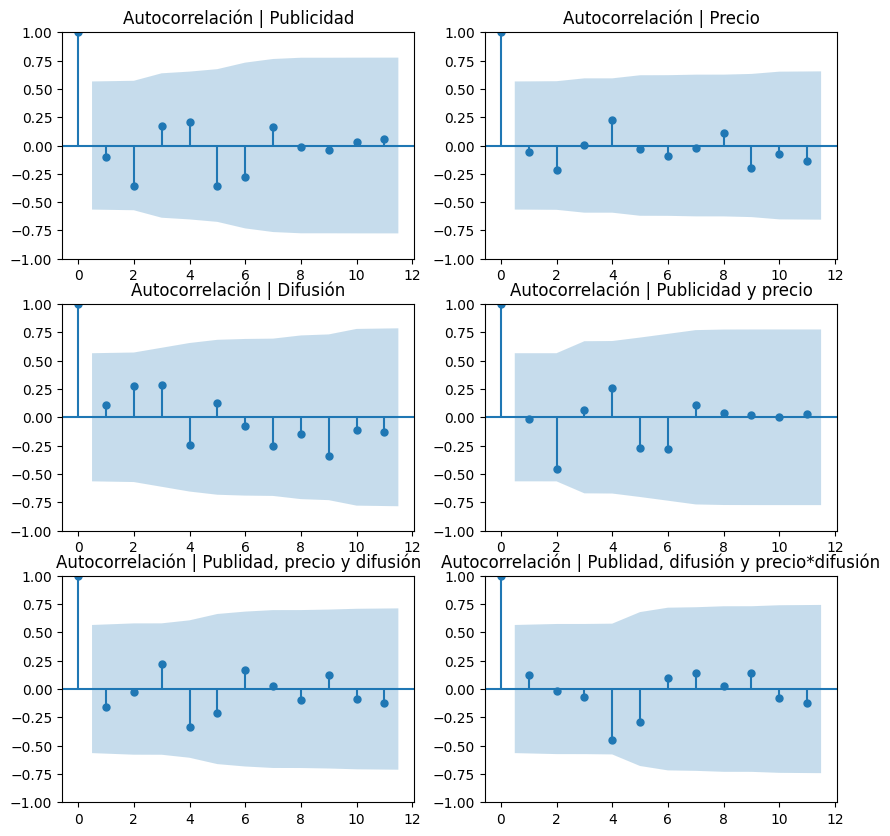

In [83]:
fig, ax = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(10, 10)

for i in range(0,3):
    for j in range(0,2):
        plot_acf(models[i][j].resid, ax=ax[i,j], title=f"Autocorrelación | {labels[i][j]}")


- Numéricamente

__Prueba de Durbin-Watson__

$$
H_0 : \mathbb{C}ov(\epsilon_i, \epsilon_j) = 0 \hspace{0.5cm} \text{v.s }\hspace{0.5cm}H_a : \mathbb{C}ov(\epsilon_i, \epsilon_j) \neq 0 
$$

Naturalmente, la prueba de Durbin-Watson usa los residuales muestrales del modelo, $e_i$. La estadística de prueba es

$$
DW = \frac{\sum_{i=2}^{n} (e_i - e_{i-1})^2}{\sum _{i=1}^{n} e_i ^2} \approx 2 (1- \mathbb{C}ov(\epsilon_i, \epsilon_{i-1}))
$$

Valores de $DW$ cercanos a $0$ o a $4$ indican autocorrelación; valores cercanos a $2$ indican que no hay autocorrelación.

Como regla podemos considerar que para tamaños de muestra moderados (alrededor de $50$), no hay autocorrelación si $1.5 \leq DW \leq 2.5$.

La autocorrelación puede ser un indicador de que hay relaciones no-lineales o de que faltan variables importantes en el modelo.

Para nuestros modelos:

In [84]:
i = 1
for model in models.flatten():
    print("Modelo ", i)
    i += 1
    print(model.summary())
    print(42 * "*-")

Modelo  1
                                  OLS Regression Results                                 
Dep. Variable:     Ventas (en miles de unidades)   R-squared:                       0.551
Model:                                       OLS   Adj. R-squared:                  0.506
Method:                            Least Squares   F-statistic:                     12.28
Date:                           Wed, 10 May 2023   Prob (F-statistic):            0.00569
Time:                                   14:04:39   Log-Likelihood:                -77.182
No. Observations:                             12   AIC:                             158.4
Df Residuals:                                 10   BIC:                             159.3
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025    

5. __Normalidad__

Otro supuesto del modelo fue que $\forall i \in \{1,\ldots,n\}, \epsilon_i \sim \mathcal{N}(0,\sigma^2)$. 
Es decir, que los errores siguen una distribución normal.
Recordemos que usamos este supuesto para calcular intervalos de confianza y para algunas pruebas de hipótesis (pruebas $F$ y $T$) para la significancia de la regresión. Si este supuesto no se cumple, no podemos considerar válidas estas pruebas e intervalos.

Para detectar no-normalidad de los residuales del modelo podemos usar métodos gráficos o numéricos.

- Gráficamente

__Q-Q plot__

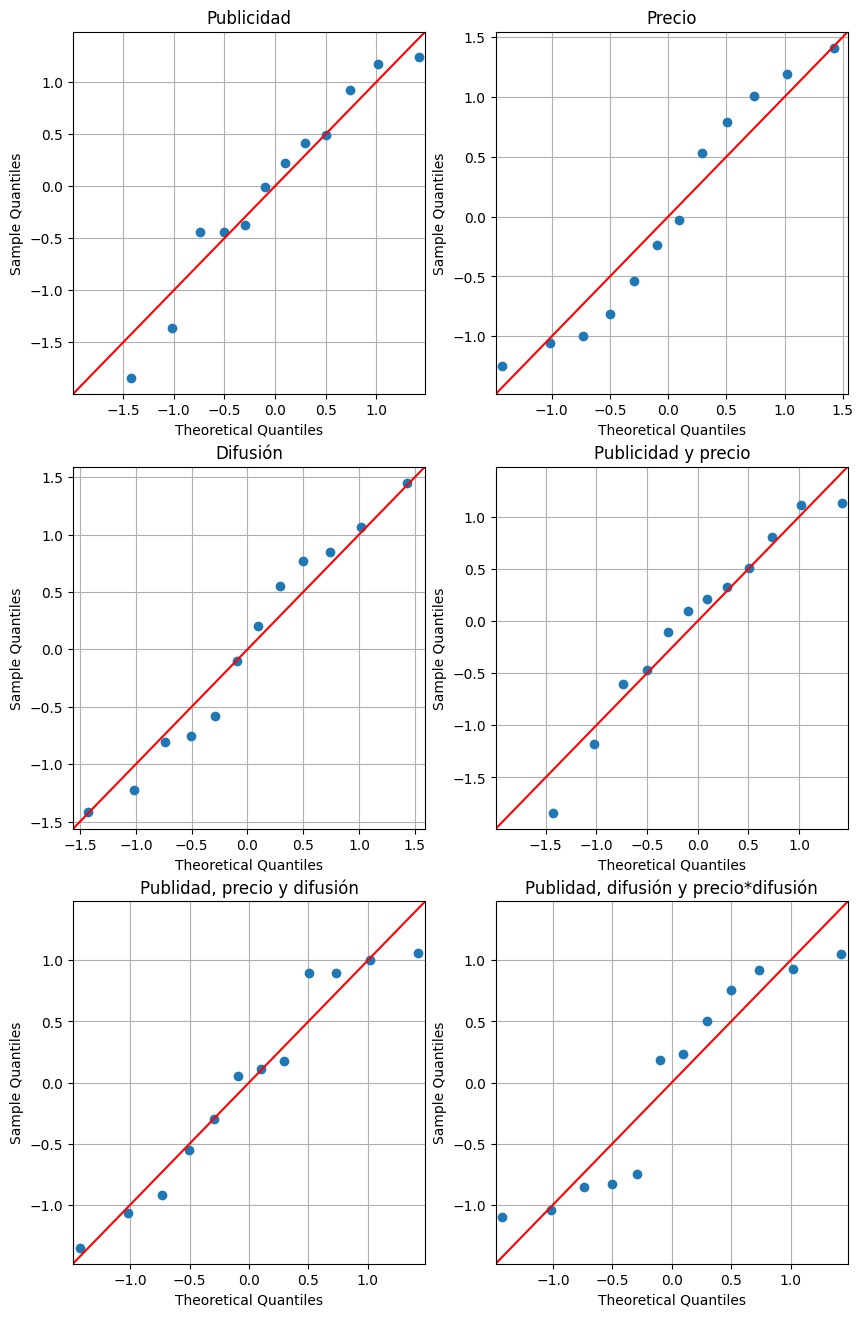

In [85]:
fig, ax = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(10, 16)


for i in range(0,3):
    for j in range(0,2):
        ax[i,j].set_title(labels[i][j])
        ax[i,j].grid()
        
        n, k = models[i][j].model.exog.shape
        k -= 1
        res = models[i][j].resid
        se = np.sqrt( np.sum(res ** 2) / (n - k - 1 ))
        std_res = res / se
        
        _fig = sm.qqplot(std_res, ax=ax[i,j], line="45")
        


Si se cumple que $\epsilon_i$ se distribuye normal, entonces los puntos deben dispersarse aleatoriamente a lo largo de la diagonal.

- Numéricamente

__Pruebas de bondad de ajuste__

- KS
- SW
- AD

$$
H_0: \epsilon_i \sim \mathcal{N}(\mu, \sigma^{2})
$$

In [86]:
alpha = 0.05
i = 1

for model in models.flatten():
    print("Modelo ", i)
    i += 1
    s, p_val = stats.shapiro(model.resid)
    if p_val <= alpha:
        print("Rechazamos la hipósis nula: No hay normalidad\np_val ", p_val, "\n")
    else:
        print("No rechazamos la hipótesis nula: hay normalidad\np_val", p_val, "\n")
        

Modelo  1
No rechazamos la hipótesis nula: hay normalidad
p_val 0.60069340467453 

Modelo  2
No rechazamos la hipótesis nula: hay normalidad
p_val 0.27747759222984314 

Modelo  3
No rechazamos la hipótesis nula: hay normalidad
p_val 0.6173603534698486 

Modelo  4
No rechazamos la hipótesis nula: hay normalidad
p_val 0.6400278806686401 

Modelo  5
No rechazamos la hipótesis nula: hay normalidad
p_val 0.28144770860671997 

Modelo  6
Rechazamos la hipósis nula: No hay normalidad
p_val  0.04495628550648689 



6. __Multicolinealidad__

Que nuestro modelo tenga o sufra multicolinealidad significa que hay asociación lineal entre los regresores. Es decir, la matriz de diseño tiene columnas que son combinación lineal de otras, por lo que no sería de rango completo y no podríamos invertir $X^{T}X$, lo cual es necesario para encontrar los estimadores usando $LS$.

Un incremento en el número de variables (columnas en la matriz de diseño) puede incrementar la multicolinealidad, por lo que es importante tratar de que el modelo sea lo más parsimónico posible.

La multicolinealidad puede incrementar $R$ de tal manera que ninguno de los coeficientes estimados sea significativo.

In [87]:
results_666.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  GLS Regression Results                                 
=========================================================================================
Dep. Variable:     Ventas (en miles de unidades)   R-squared:                       0.981
Model:                                       GLS   Adj. R-squared:                  0.792
Method:                            Least Squares   F-statistic:                     5.195
Date:                           Wed, 10 May 2023   Prob (F-statistic):              0.330
Time:                                   14:04:39   Log-Likelihood:                -58.172
No. Observations:                             12   AIC:                             138.3
Df Residuals:                                  1   BIC:                             143.7
Df Model:                                     10                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.188e+05   4.04e+06      0.178      0.888   -5.06e+07     5.2e+07
x1          5363.8316   3.45e+04      0.156      0.902   -4.33e+05    4.43e+05
x2         -2.519e+05   3.43e+05     -0.735      0.597   -4.61e+06     4.1e+06
x3            -1.0872     12.757     -0.085      0.946    -163.182     161.007
x4           -14.7525     73.337     -0.201      0.874    -946.582     917.077
x5            -0.0897      0.153     -0.586      0.662      -2.032       1.853
x6            24.6649     41.029      0.601      0.655    -496.660     545.990
x7            -3.9893     25.024     -0.159      0.899    -321.947     313.969
x8          1.492e+05   2.03e+05      0.734      0.597   -2.43e+06    2.73e+06
x9         -1.051e+05   6.92e+05     -0.152      0.904    -8.9e+06    8.69e+06
x10          -2.9e+04   3.88e+04     -0.746      0.592   -5.23e+05    4.65e+05
==============================================================================
Omnibus:                        3.794   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                1.037
Skew:                           0.021   Prob(JB):                        0.596
Kurtosis:                       4.439   Cond. No.                     1.18e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Otra consecuencia de la multicolinealidad es que al agregar o eliminar una variable del modelo, los coeficientes de la regresión cambian significativamente.

__Detectar multicolinealidad__

Hay que determinar qué variables están afectadas por la multicolinealidad y qué tan fuerte es esta.

La multicolinealidad entre dos variables (por pares) puede ser medida por su coeficiente de correlación: coeficientes de correlación cercanos a uno indican que hay colinealidad.

Para detectar multicolinealidad en un grupo de 3 o más variables hay que calcular el _factor de inflación de la variaza_

$$
VIF_j = \frac{1}{1-R_j ^2}
$$

Para calcular el _coeficiente de correlación múltiple_, $R_j^2$, hay que calcular la $R^{2}$ de un modelo tal que $X_j$ es la variable respuesta, y los demás regresores (distintos de $X_j$) las variables independientes.
Valores grandes de $R_j^2$ indican que la variable $X_j$ puede ser generada (aproximadamente) como combinación lineal de las otras variables regresoras.

Si la variable $X_j$ es redundante (i.e combinación lineal de las otras), $R_j^2 \approx 1$, por lo que $VIF_j$ será grande.

Al calcular $VIF_j$ para cada $j \in \{1,\ldots,n\}$ podemos encontrar las variables que son combinación lineal de otras (provocando multicolinealidad).

---

Además de provocar que $X^{T}X$ no sea invertible (o de generar inestabilidades numéricas), la multicolinealidad provoca que la precisión de los estimadores, $\hat{\beta}_j$ disminuye (i.e que aumente su error estándar)

In [88]:
# Para los modelos simples
corr_mat

,Ventas (en miles de unidades),Publicidad (en miles de euros),Precio (euros por unidad),Difusión (en miles de euros)
Ventas (en miles de unidades),1.000000,0.742410,-0.047555,0.713270
Publicidad (en miles de euros),0.742410,1.000000,0.155163,0.289812
Precio (euros por unidad),-0.047555,0.155163,1.000000,0.298821
Difusión (en miles de euros),0.713270,0.289812,0.298821,1.000000


In [89]:
def compute_all_mcc(X):
    for j in range(X.shape[1]):
        y = X[:,j]
        x = np.delete(X, [j], axis=1)
        m = sm.OLS(y, sm.add_constant(x)).fit()
        print(f"R_{j+1} ^2 = {m.rsquared:.3f}")

In [90]:
# Para el modelo 5
compute_all_mcc(X_123)

R_1 ^2 = 0.089
R_2 ^2 = 0.094
R_3 ^2 = 0.150


In [91]:
# Para el modelo 666
compute_all_mcc(X_666)

R_1 ^2 = 1.000
R_2 ^2 = 1.000
R_3 ^2 = 0.998
R_4 ^2 = 1.000
R_5 ^2 = 1.000
R_6 ^2 = 1.000
R_7 ^2 = 1.000
R_8 ^2 = 1.000
R_9 ^2 = 1.000
R_10 ^2 = 1.000


In [92]:
X_66 = np.delete(X_666, [0], axis=1)
compute_all_mcc(X_66)

R_1 ^2 = 1.000
R_2 ^2 = 0.998
R_3 ^2 = 0.999
R_4 ^2 = 1.000
R_5 ^2 = 1.000
R_6 ^2 = 0.999
R_7 ^2 = 1.000
R_8 ^2 = 0.999
R_9 ^2 = 1.000


In [93]:
X_66 = np.delete(X_66, [0], axis=1)
compute_all_mcc(X_66)

R_1 ^2 = 0.998
R_2 ^2 = 0.999
R_3 ^2 = 1.000
R_4 ^2 = 1.000
R_5 ^2 = 0.999
R_6 ^2 = 1.000
R_7 ^2 = 0.999
R_8 ^2 = 0.999


In [94]:
X_66 = np.delete(X_66, [2], axis=1)
compute_all_mcc(X_66)

R_1 ^2 = 0.998
R_2 ^2 = 0.998
R_3 ^2 = 0.998
R_4 ^2 = 0.999
R_5 ^2 = 1.000
R_6 ^2 = 0.999
R_7 ^2 = 0.999


In [95]:
X_66 = np.delete(X_66, [4], axis=1)
compute_all_mcc(X_66)

R_1 ^2 = 0.996
R_2 ^2 = 0.997
R_3 ^2 = 0.997
R_4 ^2 = 0.999
R_5 ^2 = 0.999
R_6 ^2 = 0.995


In [96]:
X_66 = np.delete(X_66, [4], axis=1)
compute_all_mcc(X_66)

R_1 ^2 = 0.996
R_2 ^2 = 0.995
R_3 ^2 = 0.997
R_4 ^2 = 0.985
R_5 ^2 = 0.994


In [97]:
X_66 = np.delete(X_66, [0], axis=1)
compute_all_mcc(X_66)

R_1 ^2 = 0.995
R_2 ^2 = 0.363
R_3 ^2 = 0.984
R_4 ^2 = 0.992


In [98]:
X_66 = np.delete(X_66, [0], axis=1)
compute_all_mcc(X_66)

R_1 ^2 = 0.362
R_2 ^2 = 0.105
R_3 ^2 = 0.299


Para encontrar, de manera estadísticamente inteligente, qué variables quitar (o con cuáles quedanos) podemos usar una técnica llamada [_análisis de factores_](https://en.wikipedia.org/wiki/Factor_analysis).

Una forma de prevenir la multicolinealidad es aumentando el tamaño de la nuestra, $n$.

7. __Valores atípicos influyentes__

Los _valores atípicos_ o _outliers_ son observaciones que se desvían considerablemente de la tendencia de los otros datos.

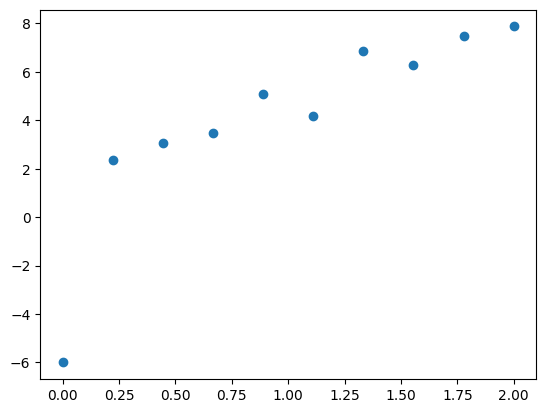

In [168]:
np.random.seed(1)
x_out = np.linspace(0,2,10)
y_out = 2 + 3 * x_out + np.random.normal(0,0.5, size=x_out.size)
y_out[0] = -6
plt.scatter(x_out, y_out);

Un valor atípico puede tener una fuerte influencia en los resultados del análisis de regresión o incluso puede llevar a que no se satisfaga alguno de los supuestos.

__Detección de valores atípicos__

Podemos usar métodos gráficos o numéricos. Para ambos es más útil trabajar con los residuales transformados:

1. Residuales
$$
e_i = y_i - \hat{y}_i
$$
2. Residuales estandarizados
$$
z_i = \frac{e_i}{SE}
$$
3. Residuales studentizados
$$
t_i = \frac{e_i}{SE\sqrt{1- h_{ii}}}
$$
4. Residuales studentizados con eliminación
$$
t_i^{*} = \frac{e_i}{SE_{(i)}\sqrt{1-h_{ii}}}
$$

donde $h_{ii}$ son los elementos de la diagonal de la matriz $H=X(X^{T}X)^{-1}X^{T}$ y $SE_{(i)}$ es el error estándar de la regresión omitiendo el $i-$ésimo dato.


Para cuantificar qué tan influyente es una observación, $(x_i, y_i)$ hay que medir dos cosas: 

- Su tamaño: qué tan alejado está $y_i$ verticalmente de su valor esperado, $\mathbb{E}(y_i|x_i)$
- Su potencia/impulso (laverage): qué tan alejado está $x_i$ de $\bar{x}$.

En otras palabras, _mientras más alejada esté una observación atípica del centro de los datos, más influyente será_, y tendrá mayor efecto en la estimación de los coeficientes de la regresión. La influencia de un punto puede calculase como

$$
\text{Influencia = tamaño $\times$ impulso}
$$

La potencia/impulso de la $i$-ésima observación (laverage) puede calcularse con la matriz $H$:

$$
h_{ii} = \frac{1}{n} + \frac{1}{n-1} \frac{(x_i - \bar{x})^2}{s_x}
$$

Podemos notar que:
1. La distancia de $x_i$ a $\bar{x}$, $(x_i - \bar{x})^2$ es fuente de impulso.
2. El impulso disminuye si la desviación estándar de la variable independiente, $s_x$ aumenta.
3. El impulso disminuye conforme aumenta el tamaño de la muestra, $n$.

Si $h_{ii} > 2 \bar{h}$, se dice que el punto $(x_i, y_i)$ tiene un impulso alto (y si es un valor atípico, entonces es influyenye). $\hat{h}$ es el promedio de los impulsos de todas las observaciones de la muestra.

In [169]:
def compute_laverages(x):
    fac1 = 1 / x.size
    fac2 = 1 / (x.size - 1)
    fac2 *= np.power(x - x.mean(), 2) / x.std()
    return fac1 + fac2

In [170]:
laverages = compute_laverages(x_out)
print(laverages)

[0.27407766 0.20530624 0.15372767 0.11934196 0.10214911 0.10214911
 0.11934196 0.15372767 0.20530624 0.27407766]


In [171]:
results_out = sm.OLS(y_out, sm.add_constant(x_out)).fit()
y_pred = predictor(results_out.model.exog, results_out.params)

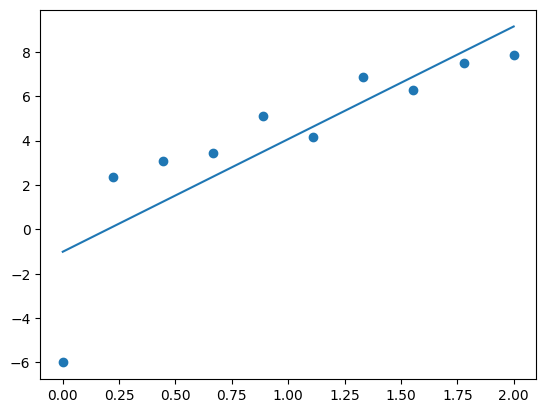

In [172]:
plt.scatter(x_out, y_out)
plt.plot(x_out, y_pred);

In [173]:
# Importancias
print( np.abs((y_out - y_pred)) * laverages)

[1.36823221 0.45992562 0.27981359 0.12960494 0.16276328 0.04615907
 0.13240998 0.09305198 0.10819153 0.34889439]


Otra forma (no-gráfica) de detectar valores atípicos es usando los diferentes residuales definidos arriba

In [220]:
def compute_transformed_residuals(results):
    residuals = {}
    
    x = results.model.exog
    n, k = x.shape
    k -= 1
    se = np.sqrt(np.sum(results.resid ** 2) / (n - k - 1 ))
    h = x @ (np.linalg.inv(x.T @ x)) @ x.T
    hi = np.diagonal(h)
    
    residuals["Normal"] = results.resid
    residuals["Standarized"] = results.resid / se
    residuals["Studentized"] = results.resid / (se * np.sqrt(1 - hi))
    # studentized_deleted_residuals = 
    
    return residuals
    

In [221]:
residuals_out = compute_transformed_residuals(results_out)

In [222]:
residuals_out

{'Normal': array([-4.99213336,  2.24019311,  1.82019013,  1.08599638,  1.59338919,
        -0.45187929,  1.10950062, -0.60530403, -0.52697634, -1.2729764 ]),
 'Standarized': array([-2.21405722,  0.99354632,  0.80727112,  0.48164942,  0.70668281,
        -0.20041264,  0.49207377, -0.26845792, -0.23371887, -0.56457678]),
 'Studentized': array([-2.73664797,  1.14609139,  0.8891846 ,  0.5155749 ,  0.74616632,
        -0.21161001,  0.5267335 , -0.29569824, -0.26960312, -0.69783558])}

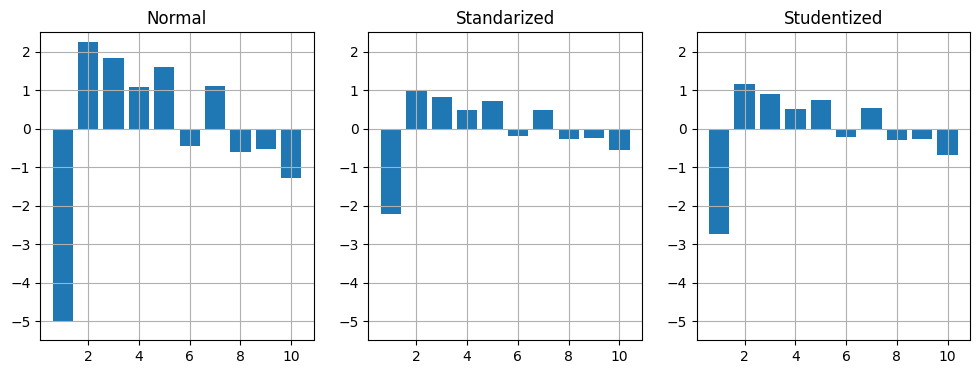

In [223]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(12, 4)

for i, res in zip(np.arange(3), residuals_out.keys()):
    ax[i].set_ylim([-5.5, 2.5])
    ax[i].grid()
    ax[i].set_title(res)
    ax[i].bar(np.arange(1, x_out.size + 1), residuals_out[res]);

__Distancia de Cook__

Otra forma de medir la influencia de un valor atípico es usando la _distancia de Cook_

$$
D_i = \frac{t_i ^2}{k+1} \frac{h_{ii}}{1-h_{ii}}
$$

Generalmente se considera que si $D_i > 1$, entonces la observación es atípica e influyente.

[Medidas de influencia](https://www.statsmodels.org/devel/generated/statsmodels.stats.outliers_influence.OLSInfluence.html)

In [246]:
influence_measures = results_out.get_influence()

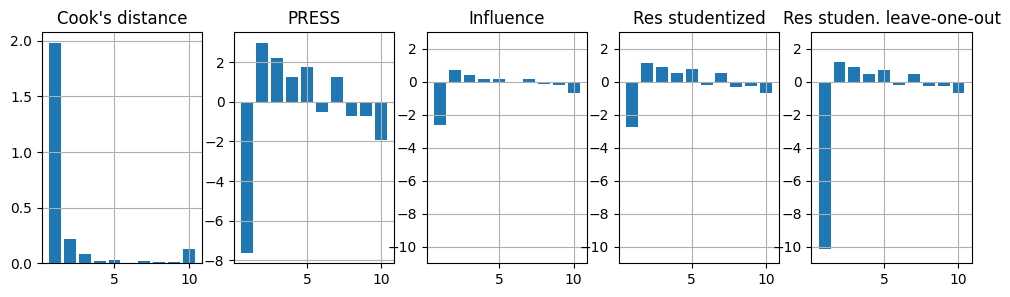

In [250]:
fig, ax = plt.subplots(nrows=1, ncols=5)
fig.set_size_inches(12, 3)

measures = {}
measures["Cook's distance"] = influence_measures.cooks_distance[0]
measures["PRESS"] = influence_measures.resid_press
measures["Influence"] = influence_measures.influence
measures["Res studentized"] = influence_measures.resid_studentized
measures["Res studen. leave-one-out"] = influence_measures.resid_studentized_external


for i, title in zip(np.arange(6), measures.keys()):
    if i > 1:
        ax[i].set_ylim(-11, 3)
        
    ax[i].grid()
    ax[i].set_title(title)
    ax[i].bar(np.arange(1, x_out.size + 1), measures[title]);

__¿Qué hacer si encontramos valores atípicos?__

Una vez que se ha detectado que la $i$-ésima observación es atípica, se puede repetir el análisis sin el dato atípico influyente; de ser el caso, se puede reportar el valor atípico y mostrar los cambios en el modelo al considerar el valor atípico y sin considerarlo.

Borrar el valor atípico generalmente no es aceptable. Antes de pensar en borrar el valor atípico hay que preguntarlos sobre la fuente que lo generó (aleatoriedad, errores al medir los datos, eventos inusuales en el contexto del experimento, eventos inusuales fuera del contexto del experimento). Es _seguro_ eliminar la observación atípica si estamos seguros de que se debió a un error o a un evento inusual fuera del contexto del experimento.